In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import datetime as dt

In [2]:
start = time.process_time()

In [3]:
#Load DataFrame, Change Date back to Datetime Index
df = pd.read_csv('/Users/josephbrennan/Desktop/Data/Merged/pson_merged.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.index = pd.DatetimeIndex(df.Date)
table_dates = df.Date
df.drop('Date', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume,Pearson,education,Edexcel,publisher,penguin,books
Date,,,,,,,,,,,
2017-01-03,698.932507,704.052891,695.518917,696.372314,2289306,58,72,72,67,61,99
2017-01-04,697.225697,698.688411,684.424736,686.131531,3337718,71,76,83,89,65,100
2017-01-05,687.838354,695.945629,686.558257,693.385437,3200061,76,79,85,86,67,99
2017-01-06,692.958673,695.518866,689.545084,694.238770,1244707,66,70,74,71,73,92
2017-01-09,695.945545,701.065929,694.347144,698.505737,1714753,80,87,99,79,64,96


In [4]:
#Check for Null
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Pearson      0
education    0
Edexcel      0
publisher    0
penguin      0
books        0
dtype: int64

In [5]:
#Last row of data used to predict
compare_price = df.tail(1)
compare_price.drop(df.iloc[:, 5:11], axis=1, inplace=True)
compare_price

/Users/josephbrennan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Open,High,Low,Close,Volume
Date,,,,,
2021-06-29,834.400024,839.400024,823.400024,830.799988,1882235


In [6]:
#Save Feature Columns
feature_list = list(compare_price.columns)
feature_list.remove('Close')
feature_list

['Open', 'High', 'Low', 'Volume']

In [7]:
df = pd.get_dummies(df)

In [8]:
#Features (X) and Labels (y)
y = df.iloc[:, 3].values
X = df.iloc[:, [0, 1, 2, 4]].values
print(y.shape)
print(X.shape)

(1135,)
(1135, 4)


In [9]:
#Model Training, Test Size Selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50, shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(794, 4)
(341, 4)
(794,)
(341,)


In [10]:
#Random Forest Regression
model = RandomForestRegressor(n_estimators = 200, bootstrap=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
#Correct Price 29/06/2021
actual_price = compare_price.iloc[0,3]
print(actual_price)

830.7999877929688


In [12]:
#Predicted Price 29/06/2021
compare_price.drop('Close', axis=1, inplace=True)
next_day_price = model.predict(compare_price)
print(next_day_price)

[827.48779114]


In [13]:
#Model Evaluation Scores
from sklearn import metrics

print('R-squared score: ', round(model.score(X_test, y_test), 3))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 3))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred), 3)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', round(100*(1 - mape), 2))

R-squared score:  0.972
Mean Absolute Error: 12.306
Mean Absolute Percentage Error (MAPE): 2.41
Mean Squared Error: 489.8201599366678 3
Root Mean Squared Error: 22.131881075423024
Accuracy: 97.59


In [14]:
#Check Importance of Variables
importances = list(model.feature_importances_)

In [15]:
#Zip features and their importance
feature_importance = [(feature, round(importance, 2)) 
                      for feature, importance in 
                      zip(compare_price, importances)]

In [16]:
#Sort Features
feature_importance = sorted(feature_importance, 
                                key = lambda x: x[1], 
                                reverse = True)

In [17]:
#Print Feature Importance
for feature, importance in feature_importance:
    print(f'Variable: {feature} \tImportance: {importance}')

Variable: Low 	Importance: 0.64
Variable: High 	Importance: 0.28
Variable: Open 	Importance: 0.08
Variable: Volume 	Importance: 0.0


Text(0.5, 1.0, 'Variable Importances')

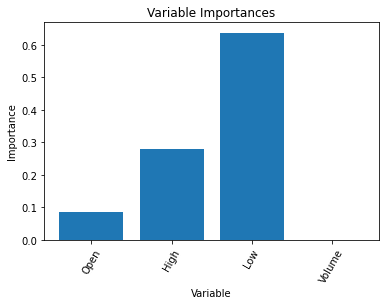

In [18]:
%matplotlib inline

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, compare_price, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable')
plt.xticks(rotation='60')
plt.title('Variable Importances')

In [19]:
dates = df.index
dates

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-21',
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-28', '2021-06-29'],
              dtype='datetime64[ns]', name='Date', length=1135, freq=None)

In [20]:
true_data =pd.DataFrame(data = {'date': dates, 'actual': y})
true_data

,date,actual
0,2017-01-03,696.372314
1,2017-01-04,686.131531
2,2017-01-05,693.385437
3,2017-01-06,694.238770
4,2017-01-09,698.505737
...,...,...
1130,2021-06-23,845.400024
1131,2021-06-24,835.000000
1132,2021-06-25,838.000000
1133,2021-06-28,833.400024


In [21]:
test_dates = table_dates[1-(len(y_pred)+1):]

In [22]:
predictions_data = pd.DataFrame(data = {'date': test_dates, 'predictions':y_pred})
predictions_data

,date,predictions
Date,,
2020-02-21,2020-02-21,533.302921
2020-02-24,2020-02-24,535.168131
2020-02-25,2020-02-25,561.973411
2020-02-26,2020-02-26,549.898884
2020-02-27,2020-02-27,544.786595
...,...,...
2021-06-23,2021-06-23,848.305602
2021-06-24,2021-06-24,835.915016
2021-06-25,2021-06-25,833.642065


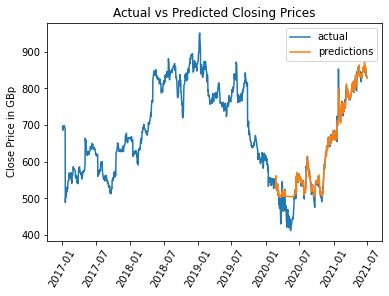

In [23]:
plt.plot(true_data['date'], true_data['actual'], label = 'actual')
plt.plot(predictions_data['date'], predictions_data['predictions'], label='predictions')
plt.xticks(rotation='60')
plt.ylabel("Close Price in GBp")
plt.title("Actual vs Predicted Closing Prices")
plt.legend()
plt.show()